# 🏁 Kart Lap Times Analysis

## 📘 Project Summary

This notebook is part of the **Kart Lap Times Analysis** project — a data analytics case study focused on understanding patterns and performance in go-kart racing lap times.

The dataset was scraped from a public kart timing website and processed to analyze:
- Driver performance trends  
- Track-specific lap time variations  
- Consistency and improvement over multiple sessions  
- Factors influencing lap speed (e.g., driver, track, conditions)

---

## 🎯 Objectives

1. **Data Collection:**  
   Use Python web scraping tools to extract lap time records from an online leaderboard.

2. **Data Cleaning & Preparation:**  
   Convert scraped data into structured formats (CSV, Pandas DataFrame), handle missing values, and normalize time formats.

3. **Exploratory Data Analysis (EDA):**  
   - Identify the fastest drivers and average lap time distributions.  
   - Visualize performance differences across tracks or sessions.  
   - Detect anomalies or outliers in recorded lap times.

4. **Visualization & Insights:**  
   Use Seaborn and Matplotlib to build visual stories that reveal key insights and trends.

5. **Conclusions & Recommendations:**  
   Summarize findings and discuss possible next steps (e.g., predictive modeling or strategy optimization).

---

## 🧰 Tools & Technologies

| Purpose | Tools Used |
|----------|-------------|
| Web Scraping | `requests`, `BeautifulSoup4` |
| Data Handling | `pandas`, `numpy` |
| Visualization | `matplotlib`, `seaborn` |
| Analysis | `jupyter`, `python 3.x` |

---

## 📂 Notebook Outline

1. **Introduction & Data Overview**  
2. **Data Cleaning and Preprocessing**  
3. **Exploratory Data Analysis (EDA)**  
4. **Visual Insights**  
5. **Conclusions and Future Work**

---

## 🚀 Next Steps

- Enrich dataset with additional variables (e.g., weather, driver age).  
- Build a regression or time-series model to predict lap times.  
- Automate regular data scraping and dashboard updates.

---

> **Author:** Your Name  
> **Repository:** [GitHub Link to Project]  
> **Last Updated:** October 2025


In [9]:
import os

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pylab as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

import locale
locale.setlocale(locale.LC_TIME, "nl_NL.UTF-8")

'nl_NL.UTF-8'

## Overall analysis

Statistics:  
Fastest driver per track (GOAT): different tracks  
Do drivers get better: average speed increase over lap  
Impact of aging: average fastest lap decay over time  
Does it matter witch kart you drive: difference between 2 karts in a window

Economics:  
revenue per day (average per customer)  

number of recuring customers per day  
max number of possible drivers per day  
missed opertunity  

Staff planning: correlation between weather and number of customers  


## Heat analysis of my own heat

Selecteer:
- locatie
- heat (open om de coureurs te zien)
- coureur
- keuze:
    - export lap tijden per coureur
    - selecteer 2de heat

App:
1. Heat:
    - (bar) Positie
    - (line) Snelste ronde per lap
    - (table) Statistieken
2. Eigen prestatie:
    - (line) Lap tijden
    - (hist) Snelste lap t.o.v. afgelopen maand
    - (hist) Snelste lap t.o.v. afgelopen jaar
3. Heat vergelijken:
    - (line) Ronde tijd per lap
4. Groep vergelijken:
    - (line) fastest lap per heat
    - (table) statistieken

## Data form their website:  

They have 3 different tracks in delft
and 2 in amsterdam


Data 30-minuten races 2025:

Maandag 20 januari: Delft
Dinsdag 28 januari: Amsterdam
Maandag 3 februari: Delft
Dinsdag 11 februari: Amsterdam
Maandag 17 februari: Delft
Dinsdag 25 februari: Amsterdam
Maandag 3 maart: Delft
Dinsdag 11 maart: Amsterdam
Maandag 17 maart: Delft
Dinsdag 25 maart: Amsterdam



In [173]:
df = pd.read_csv("data.csv", parse_dates=["datetime"])
df = df.astype({"kart": "category"})

In [3]:
df.head()

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft


In [174]:
df.dtypes

heat_id              object
heat_name            object
datetime     datetime64[ns]
name                 object
kart               category
lap_time            float64
lap                   int64
location             object
dtype: object

In [224]:
df["date"] = pd.to_datetime(df["datetime"].dt.date)
df["hour"] = df["datetime"].dt.hour
df["iso_week"] = df["datetime"].dt.isocalendar().week
df["iso_year"] = df["datetime"].dt.isocalendar().year
df["year_month"] = df["datetime"].values.astype("datetime64[M]")
df["weekday"] = df["datetime"].dt.day_name()

In [225]:
df.head()

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location,date,hour,iso_week,iso_year,year_month,weekday
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft,2025-02-01,12,5,2025,2025-02-01,Saturday
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft,2025-02-01,12,5,2025,2025-02-01,Saturday
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft,2025-02-01,12,5,2025,2025-02-01,Saturday
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft,2025-02-01,12,5,2025,2025-02-01,Saturday
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft,2025-02-01,12,5,2025,2025-02-01,Saturday


First we'll look at the number of heats per week

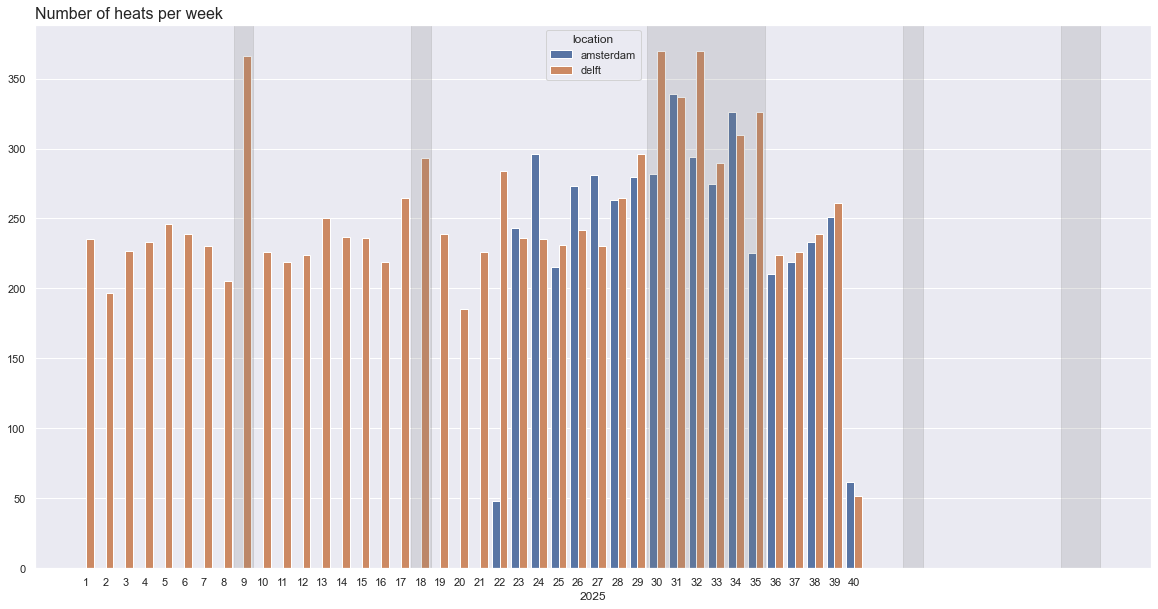

In [149]:
ax = sns.barplot(
    data=df.groupby(["location", "iso_year", "iso_week"])["heat_id"].nunique().reset_index(),
    x="iso_week",
    y="heat_id",
    hue="location"
)

# Highlight specific weeks
holiday_weeks = [(9, 9), (18, 18), (30, 35), (43, 43), (51, 52)]

for start, end in holiday_weeks:
    ax.axvspan(
        start-1.5,
        end-0.5,
        color="grey",
        alpha=0.2,
        label="holiday"
    )
#     ax.text((start+end)/2, ax.get_ylim()[1]*0.95, 'Holiday', color='black',
#             ha='center', va='top', fontsize=10, fontweight='bold')

ax.set_title("Number of heats per week", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel("2025")

plt.show()

School holiday:
- week 9
- week 18
- week 30 t/m 35

Are higher

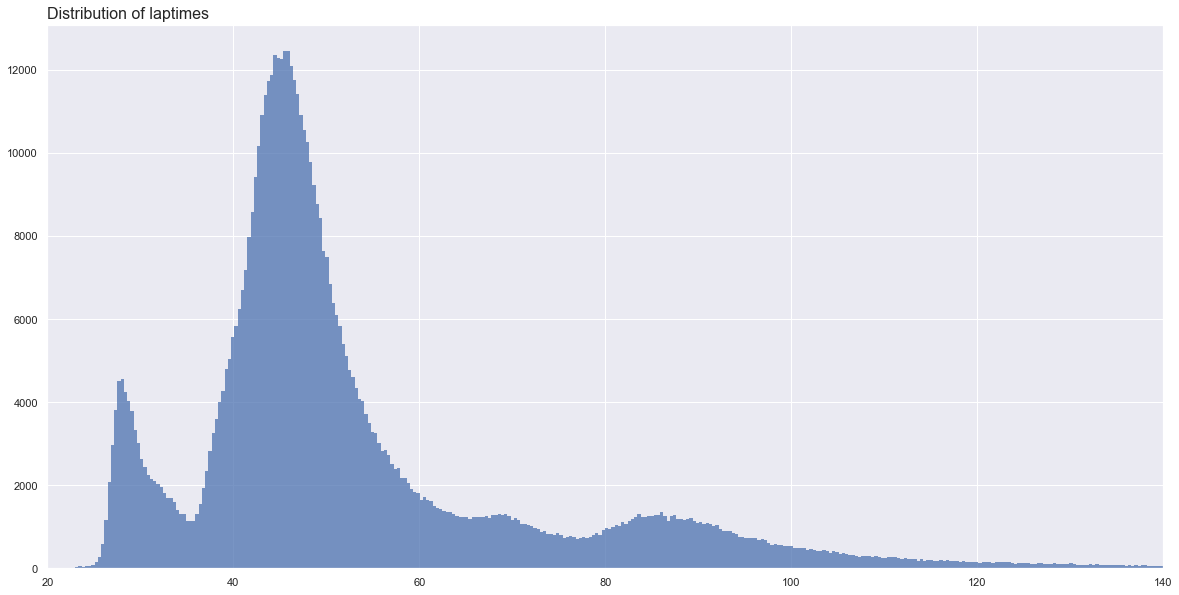

In [150]:
ax = sns.histplot(
    data=df[df["location"] == "delft"],
    x="lap_time"
)
plt.xlim(20, 140)

ax.set_title("Distribution of laptimes", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

This histgram strongly sugdests that there are multiple tracks that can be driven on this location. It seems at first sight that there are 4 peaks indicating there might be 4 different tracks.

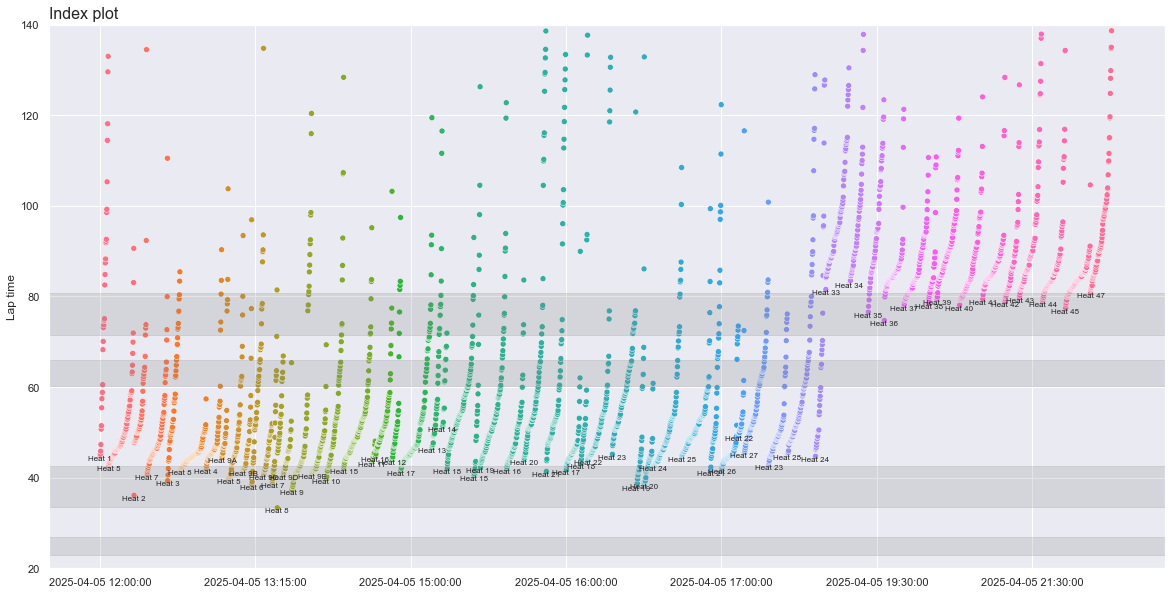

In [143]:
temp = df[df["location"] == "delft"] \
    .sort_values(["datetime", "heat_id", "lap_time"]).reset_index()

temp = temp[temp["date"] == "2025-04-05"]

ax = sns.scatterplot(
    x=temp.index,
    y=temp["lap_time"],
    hue=temp["heat_id"],
    legend=False
)

for heat_id, group in temp.groupby("heat_id"):
    min_idx = group["lap_time"].idxmin()
    x_val = temp.loc[min_idx].name
    y_val = temp.loc[min_idx, "lap_time"]
    label = temp.loc[min_idx, "heat_name"]

    # add the index as text on the plot
    plt.text(x_val, y_val, label, fontsize=8, ha="center", va="top")
    
for i in range(4):
    ax.axhspan(
        valley_points[i],
        modes[i],
        color="grey",
        alpha=0.2,
    )

# for mode in modes[:4]:
#     ax.axhline(y=mode, color="b", linestyle="--", linewidth=1)

plt.xticks(temp.index[::600], temp["datetime"][::600])
plt.ylim(20, 140)

ax.set_title("Index plot", fontsize=16, loc="left")
ax.set_ylabel("Lap time")
ax.set_xlabel(None)

plt.show()

Here it clearly shows that there are multiple tracks driven on this day. At the end of the day it looks like they change the track to a longer one.

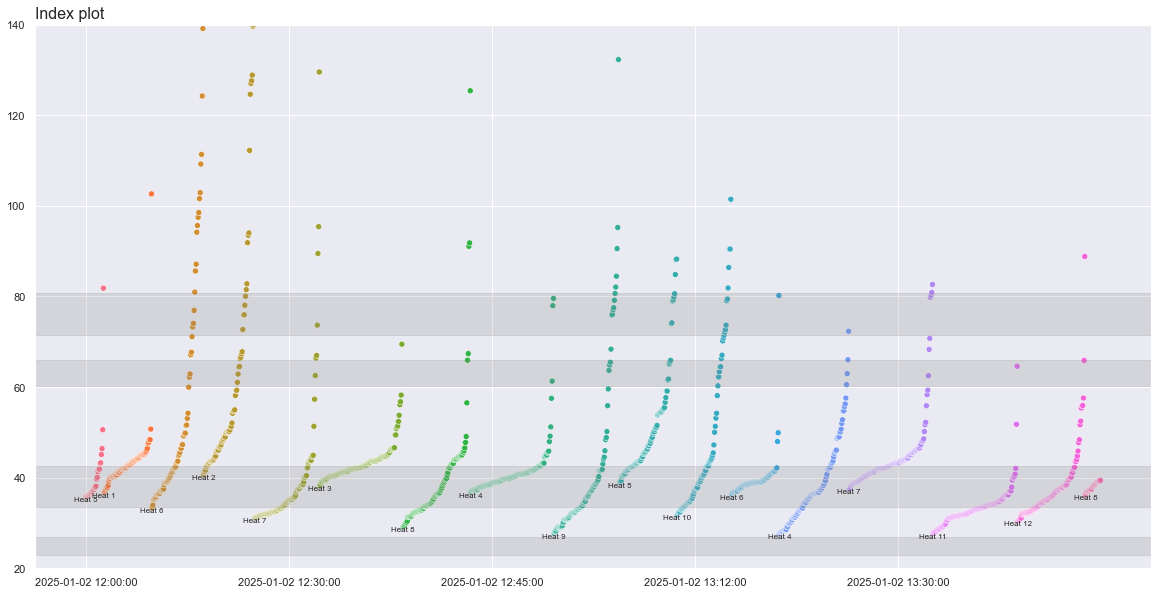

In [152]:
temp = df[df["location"] == "delft"] \
    .sort_values(["datetime", "heat_id", "lap_time"]).reset_index() \
    .iloc[3000:4500,:]

ax = sns.scatterplot(
    x=temp.index,
    y=temp["lap_time"],
    hue=temp["heat_id"],
    legend=False
)

for heat_id, group in temp.groupby("heat_id"):
    min_idx = group["lap_time"].idxmin()
    x_val = temp.loc[min_idx].name
    y_val = temp.loc[min_idx, "lap_time"]
    label = temp.loc[min_idx, "heat_name"]

    # add the index as text on the plot
    plt.text(x_val, y_val, label, fontsize=8, ha="center", va="top")
    

for i in range(4):
    ax.axhspan(
        valley_points[i],
        modes[i],
        color="grey",
        alpha=0.2,
    )
    

plt.xticks(temp.index[::300], temp["datetime"][::300])
plt.ylim(20, 140)

ax.set_title("Index plot", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

We can try to filter out all the bad drivers. All drivers and laps within a single heat are triven on the same track. So if we grab the fastest lap for a specific heat, we might be able to better isolate the different tracks there are.

In [94]:
heat_summary = df[df["location"] == "delft"].groupby("heat_id").agg({
    "lap_time": ["mean", "median", "std", "min", "max"]
})

In [95]:
heat_summary.head()

lap_time                          
                                     mean median   std   min    max
heat_id                                                            
00025F3712AC4C92AA1865D493681B9F    53.25  48.70 15.63 44.00 153.50
000471599F714613BFF5848FCE40410E    59.65  53.78 15.47 42.70 109.97
0015649A2FAD48C99B16F8130F3906FE    51.59  46.58  9.68 41.80  81.73
001D5543C9C34AB2B03D993A3E05AB0B    51.33  47.84  9.25 43.34  86.82
003039C4DBCE45359076520C544A92F0    39.65  39.85  2.07 36.61  46.33

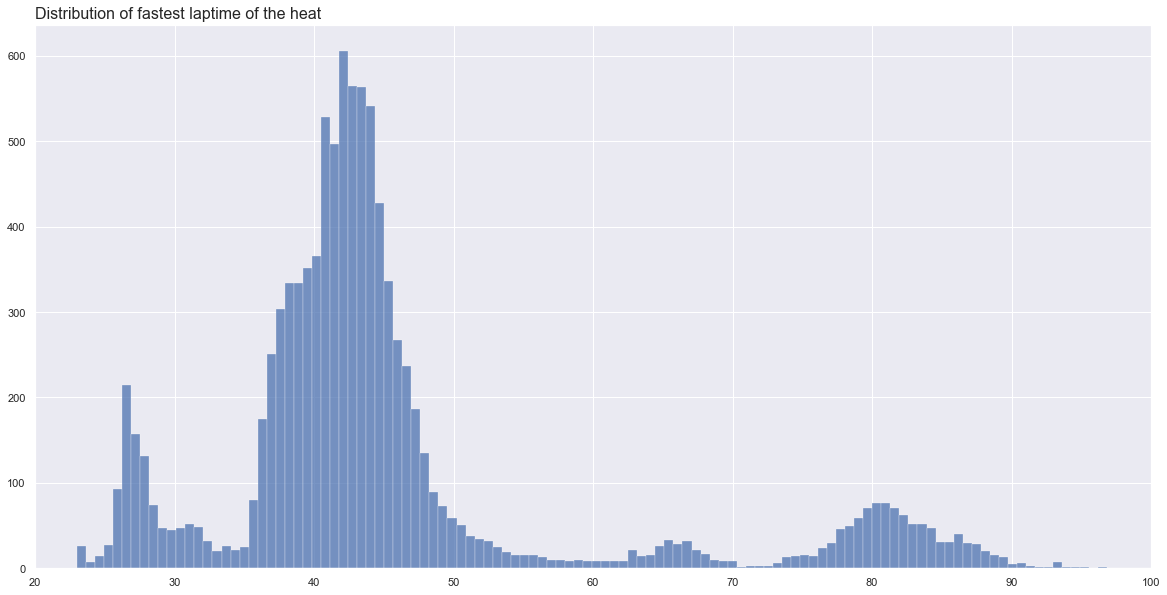

In [96]:
ax = sns.histplot(
    x=heat_summary["lap_time"]["min"]
)
plt.xlim(20, 100)

ax.set_title("Distribution of fastest laptime of the heat", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [213]:
n_heats = df[df["location"] == "delft"].groupby("kart")["heat_id"].nunique().reset_index().set_index("kart").dropna()

In [214]:
kart_summary = df[df["location"] == "delft"].groupby("kart").agg({
    "lap_time": ["mean", "median", "std", "min", "max"]
}).dropna()

kart_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in kart_summary.columns]

n_heats = n_heats.rename(columns={"heat_id": "n_heats"})
kart_summary = kart_summary.join(n_heats)

In [215]:
kart_summary.head()

,lap_time_mean,lap_time_median,lap_time_std,lap_time_min,lap_time_max,n_heats
kart,,,,,,
1,53.80,46.75,23.90,23.27,597.94,1734
2,53.64,46.02,49.65,24.10,4043.25,1740
3,53.92,46.25,24.40,23.39,461.72,1624
4,57.74,47.80,71.81,23.33,5303.61,1369
5,57.86,48.13,56.45,24.64,5284.38,1252


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '51',
       '53', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '9824', '9917', '9920', '9922', '136220',
       '143634', '212606', '418056', '430178', '434068', '435377', '801042',
       '1010557'],
      dtype='object', name='kart')

<AxesSubplot:xlabel='kart', ylabel='lap_time_min'>

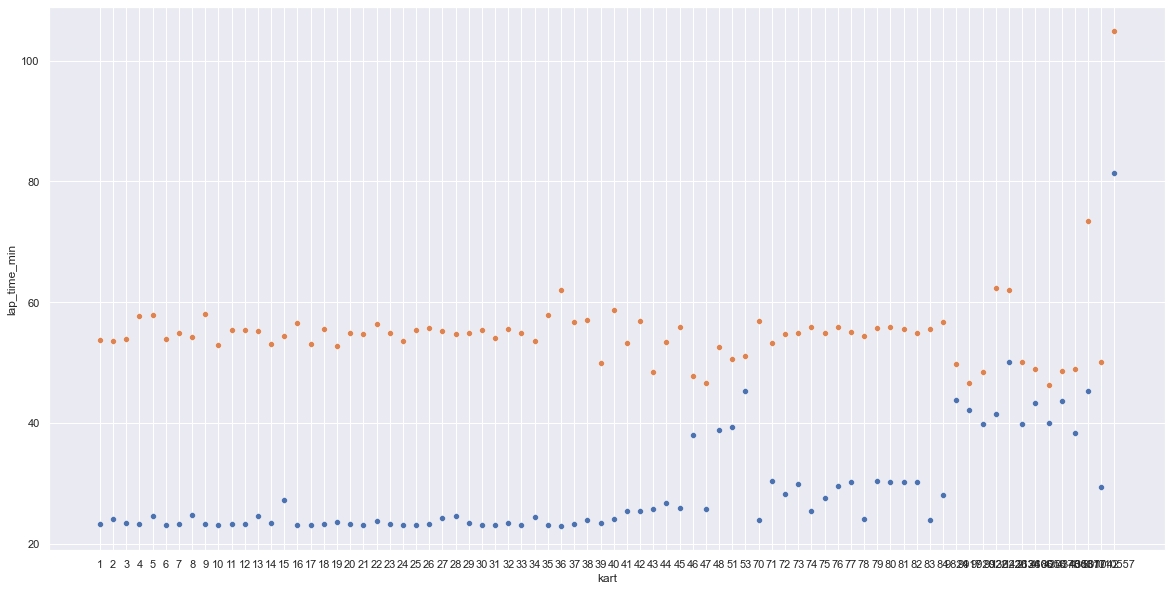

In [222]:
sns.scatterplot(
    x=kart_summary.index.astype("str"),
    y=kart_summary["lap_time_min"]
)
sns.scatterplot(
    x=kart_summary.index.astype("str"),
    y=kart_summary["lap_time_mean"]
)

In [217]:
kart_summary.head()

,lap_time_mean,lap_time_median,lap_time_std,lap_time_min,lap_time_max,n_heats
kart,,,,,,
1,53.80,46.75,23.90,23.27,597.94,1734
2,53.64,46.02,49.65,24.10,4043.25,1740
3,53.92,46.25,24.40,23.39,461.72,1624
4,57.74,47.80,71.81,23.33,5303.61,1369
5,57.86,48.13,56.45,24.64,5284.38,1252


In [218]:
kart_summary.tail()

,lap_time_mean,lap_time_median,lap_time_std,lap_time_min,lap_time_max,n_heats
kart,,,,,,
430178,48.58,47.76,3.95,43.63,60.48,3
434068,48.98,41.76,33.79,38.34,192.21,2
435377,73.53,72.91,30.27,45.31,208.08,8
801042,50.08,41.59,35.81,29.37,428.14,36
1010557,104.85,89.00,66.03,81.33,477.21,7


In [208]:
set(df[df["location"] == "delft"]["heat_name"])

{'Heat',
 'Heat 1',
 'Heat 10',
 'Heat 100',
 'Heat 100000',
 'Heat 101',
 'Heat 102',
 'Heat 103',
 'Heat 104',
 'Heat 11',
 'Heat 11A',
 'Heat 11AA',
 'Heat 11AB',
 'Heat 11AC',
 'Heat 11AD',
 'Heat 11AE',
 'Heat 11AF',
 'Heat 11AG',
 'Heat 11AH',
 'Heat 11AI',
 'Heat 11B',
 'Heat 11C',
 'Heat 11D',
 'Heat 11E',
 'Heat 11F',
 'Heat 11G',
 'Heat 11H',
 'Heat 11I',
 'Heat 11M',
 'Heat 12',
 'Heat 1234',
 'Heat 12A',
 'Heat 12B',
 'Heat 12C',
 'Heat 12D',
 'Heat 12E',
 'Heat 13',
 'Heat 13A',
 'Heat 13B',
 'Heat 13C',
 'Heat 13D',
 'Heat 13E',
 'Heat 13F',
 'Heat 13G',
 'Heat 13H',
 'Heat 13I',
 'Heat 13J',
 'Heat 13K',
 'Heat 13P',
 'Heat 14',
 'Heat 14A',
 'Heat 14B',
 'Heat 14C',
 'Heat 14D',
 'Heat 14E',
 'Heat 14F',
 'Heat 14H',
 'Heat 14I',
 'Heat 15',
 'Heat 15A',
 'Heat 15AA',
 'Heat 15AB',
 'Heat 15AC',
 'Heat 15AD',
 'Heat 15AE',
 'Heat 15B',
 'Heat 15C',
 'Heat 15D',
 'Heat 15E',
 'Heat 15F',
 'Heat 15G',
 'Heat 15H',
 'Heat 15I',
 'Heat 16',
 'Heat 16A',
 'Heat 16B',
 'Heat 

In [207]:
df[df["kart"] == 12000299]

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location
1047106,49A6DBB57DEE468CA001F0A2EC839365,Heat vrije ruimte,2025-06-18 11:15:00,Hub van Doorne,12000299,70.88,1,amsterdam
1047107,49A6DBB57DEE468CA001F0A2EC839365,Heat vrije ruimte,2025-06-18 11:15:00,Hub van Doorne,12000299,43.25,2,amsterdam
1047108,49A6DBB57DEE468CA001F0A2EC839365,Heat vrije ruimte,2025-06-18 11:15:00,Hub van Doorne,12000299,45.11,3,amsterdam
1047631,09A589C1427F43EEAF3A558C9D97A82A,Heat ROC 700 personen,2025-06-18 12:00:00,Hub van Doorne,12000299,31.60,1,amsterdam
1047632,09A589C1427F43EEAF3A558C9D97A82A,Heat ROC 700 personen,2025-06-18 12:00:00,Hub van Doorne,12000299,84.45,2,amsterdam
...,...,...,...,...,...,...,...,...
1048943,0061078CF54746AE8949A0462E4936A9,Heat vrije ruimte,2025-06-18 13:55:00,Hub van Doorne,12000299,25.12,31,amsterdam
1048944,0061078CF54746AE8949A0462E4936A9,Heat vrije ruimte,2025-06-18 13:55:00,Hub van Doorne,12000299,25.51,32,amsterdam
1048945,0061078CF54746AE8949A0462E4936A9,Heat vrije ruimte,2025-06-18 13:55:00,Hub van Doorne,12000299,25.52,33,amsterdam
1048946,0061078CF54746AE8949A0462E4936A9,Heat vrije ruimte,2025-06-18 13:55:00,Hub van Doorne,12000299,25.94,34,amsterdam


In [226]:
df[
    (df["location"] == "delft")
    & (df["kart"] == 23)
].groupby("date")["lap_time"].min()

date
2025-01-02   35.48
2025-01-03   36.43
2025-01-04   26.41
2025-01-05   29.08
2025-01-06   53.19
              ... 
2025-09-25   41.58
2025-09-26   38.25
2025-09-27   40.97
2025-09-28   45.06
2025-09-30   43.53
Name: lap_time, Length: 236, dtype: float64

<AxesSubplot:xlabel='lap_time', ylabel='Count'>

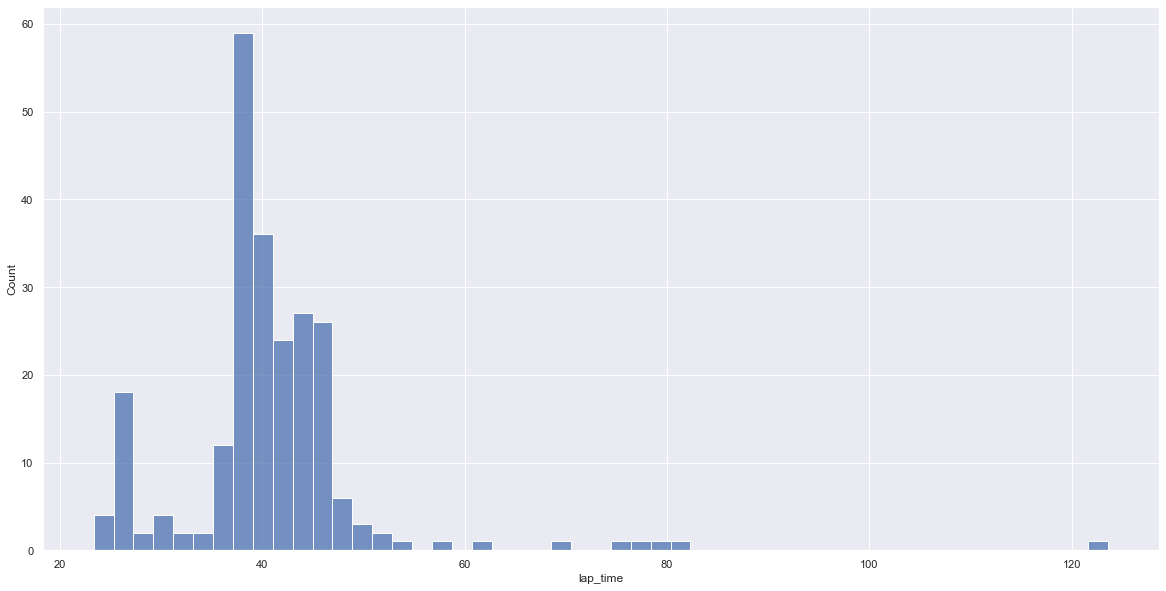

In [227]:
sns.histplot(x=df[
    (df["location"] == "delft")
    & (df["kart"] == 23)
].groupby("date")["lap_time"].min())

<AxesSubplot:xlabel='min', ylabel='Count'>

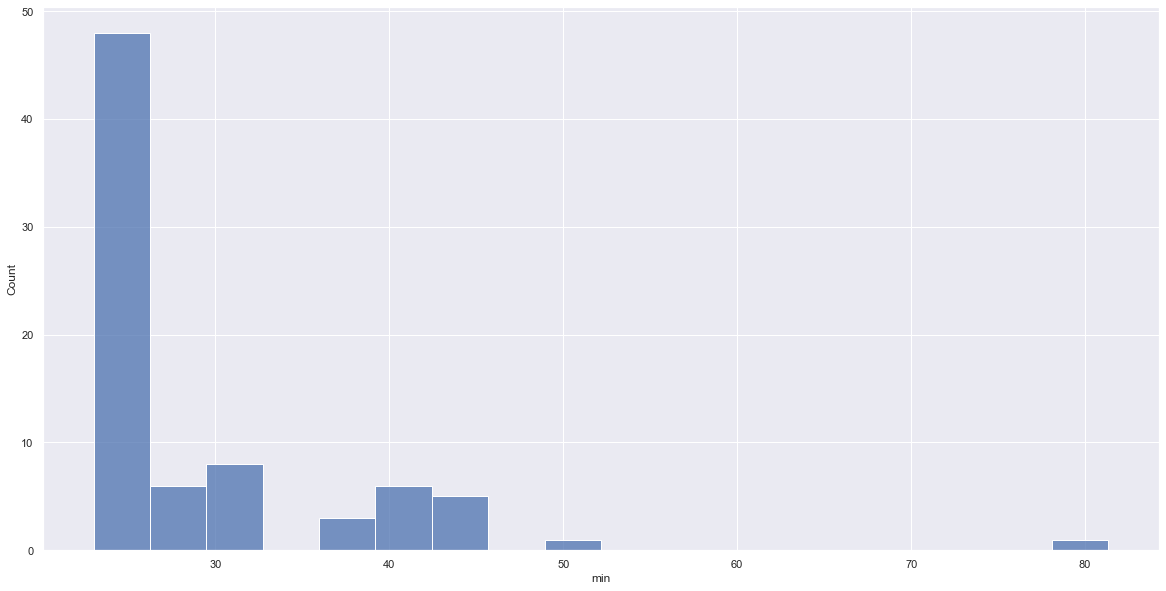

In [179]:
sns.histplot(x=kart_summary["lap_time"]["min"])

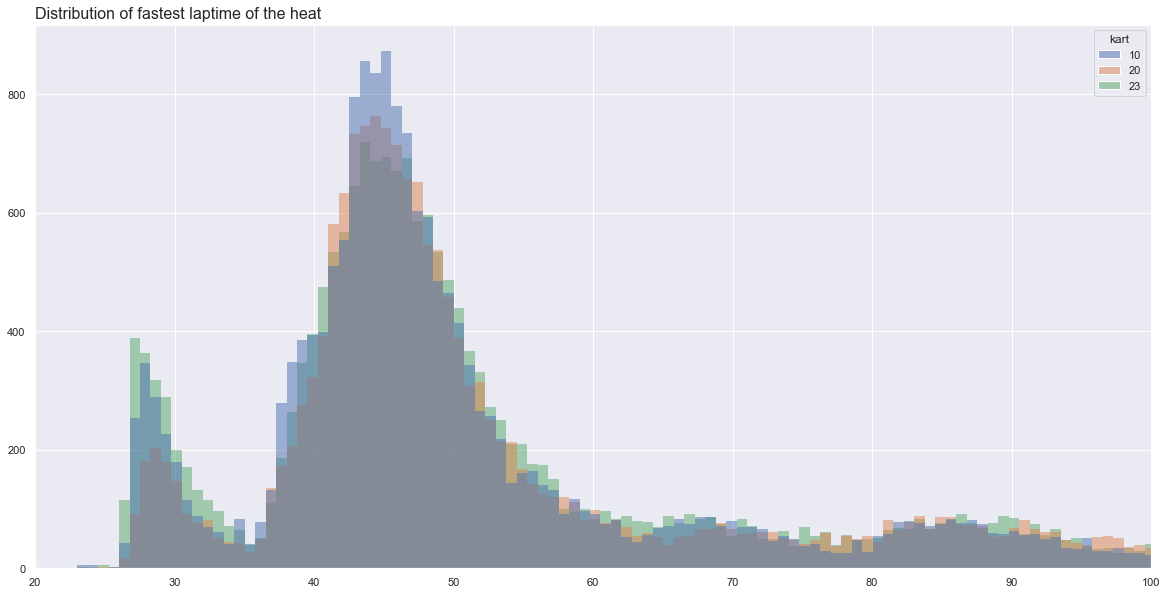

In [172]:
temp = df[
    (df["location"] == "delft")
    & (df["kart"].isin([23, 10, 20]))
]
temp = temp.astype({"kart": "category"})

ax = sns.histplot(
    data=temp,
    x="lap_time",
    hue="kart"
)
plt.xlim(20, 100)

ax.set_title("Distribution of fastest laptime of the heat", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [ ]:
temp = df[df["location"] == "delft"] \
    .sort_values(["datetime", "heat_id", "lap_time"]).reset_index()

temp = temp[temp["date"] == "2025-04-05"]

ax = sns.scatterplot(
    x=temp.index,
    y=temp["lap_time"],
    hue=temp["heat_id"],
    legend=False
)

for heat_id, group in temp.groupby("heat_id"):
    min_idx = group["lap_time"].idxmin()
    x_val = temp.loc[min_idx].name
    y_val = temp.loc[min_idx, "lap_time"]
    label = temp.loc[min_idx, "heat_name"]

    # add the index as text on the plot
    plt.text(x_val, y_val, label, fontsize=8, ha="center", va="top")
    
for i in range(4):
    ax.axhspan(
        valley_points[i],
        modes[i],
        color="grey",
        alpha=0.2,
    )

# for mode in modes[:4]:
#     ax.axhline(y=mode, color="b", linestyle="--", linewidth=1)

plt.xticks(temp.index[::600], temp["datetime"][::600])
plt.ylim(20, 140)

ax.set_title("Index plot", fontsize=16, loc="left")
ax.set_ylabel("Lap time")
ax.set_xlabel(None)

plt.show()

In [133]:
from statsmodels.nonparametric.kde import KDEUnivariate

data = heat_summary["lap_time"]["min"]

kde = KDEUnivariate(data)
kde.fit(bw="scott")

x = kde.support
y = kde.density

In [139]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(y)
modes = x[peaks]

valleys, _ = find_peaks(-y)
valley_points = np.insert(x[valleys], 0, data.min())

In [140]:
modes[:4]

array([27.00090537, 42.58335634, 66.03356744, 80.78944439])

In [141]:
valley_points[:4]

array([23.        , 33.56757675, 60.14040081, 71.46752627])

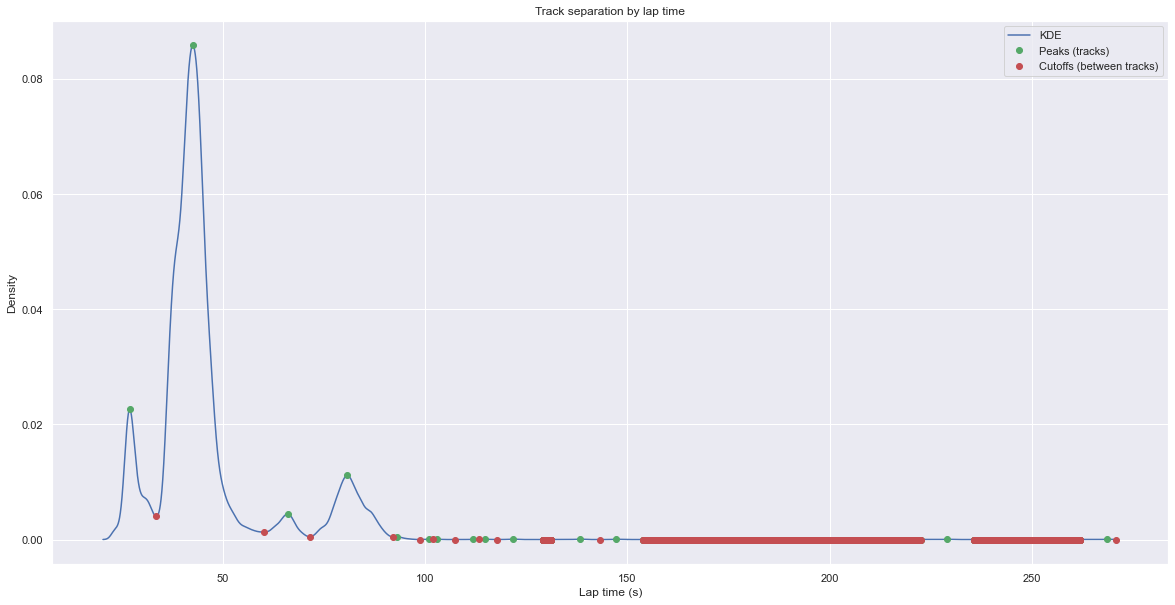

Detected modes: [ 27.    42.58  66.03 ... 261.86 261.99 268.54]
Detected cutoffs (boundaries between tracks): [ 33.57  60.14  71.47 ... 261.87 262.01 270.73]


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.signal import find_peaks

# 1. Fit KDE
fastest = heat_summary["lap_time"]["min"]
kde = KDEUnivariate(fastest)
kde.fit(bw="scott")

# 2. Find local maxima (modes)
peaks, _ = find_peaks(kde.density)
modes = kde.support[peaks]

# 3. Find local minima (valleys)
valleys, _ = find_peaks(-kde.density)
cutoffs = kde.support[valleys]

# 4. Plot for sanity check
plt.plot(kde.support, kde.density, label="KDE")
plt.plot(modes, kde.density[peaks], "go", label="Peaks (tracks)")
plt.plot(cutoffs, kde.density[valleys], "ro", label="Cutoffs (between tracks)")
plt.legend()
plt.xlabel("Lap time (s)")
plt.ylabel("Density")
plt.title("Track separation by lap time")
plt.show()

print("Detected modes:", np.round(modes, 2))
print("Detected cutoffs (boundaries between tracks):", np.round(cutoffs, 2))


In [35]:
df[df["location"] == "delft"].head()

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location,date,hour,iso_week,iso_year,year_month
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft,2025-02-01,12,5,2025,2025-02-01
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft,2025-02-01,12,5,2025,2025-02-01
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft,2025-02-01,12,5,2025,2025-02-01
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft,2025-02-01,12,5,2025,2025-02-01
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft,2025-02-01,12,5,2025,2025-02-01


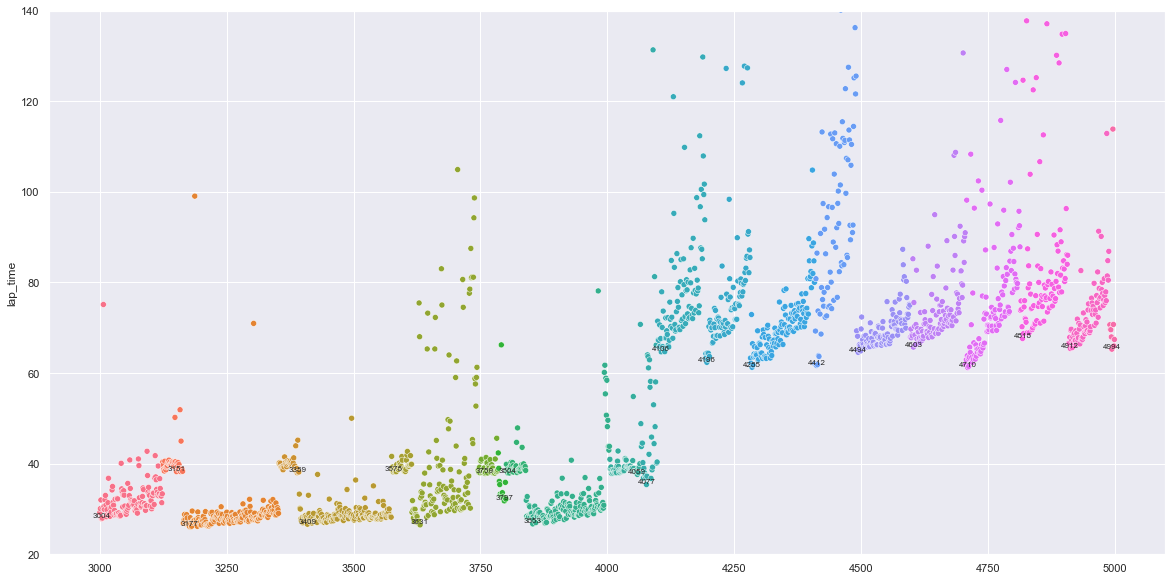

In [53]:
temp = df[df["location"] == "delft"].iloc[3000:5000,:]

sns.scatterplot(
    x=temp.index,
    y=temp["lap_time"],
    hue=temp["heat_id"],
    legend=False
)
plt.ylim(20, 140)


for heat_id, group in temp.groupby("heat_id"):
    min_idx = group["lap_time"].idxmin()
    x_val = temp.loc[min_idx].name  # current index in temp (after slicing)
    y_val = temp.loc[min_idx, "lap_time"]

    # add the index as text on the plot
    plt.text(x_val, y_val, str(x_val), fontsize=8, ha='center', va='bottom')

In [14]:
df["heat_min"] = df.groupby("heat_id")["lap_time"].transform("min")
df["track"] = df["heat_min"].apply(lambda x: 'A' if x < 34.37 else ('B' if x < 60.24 else 'C'))

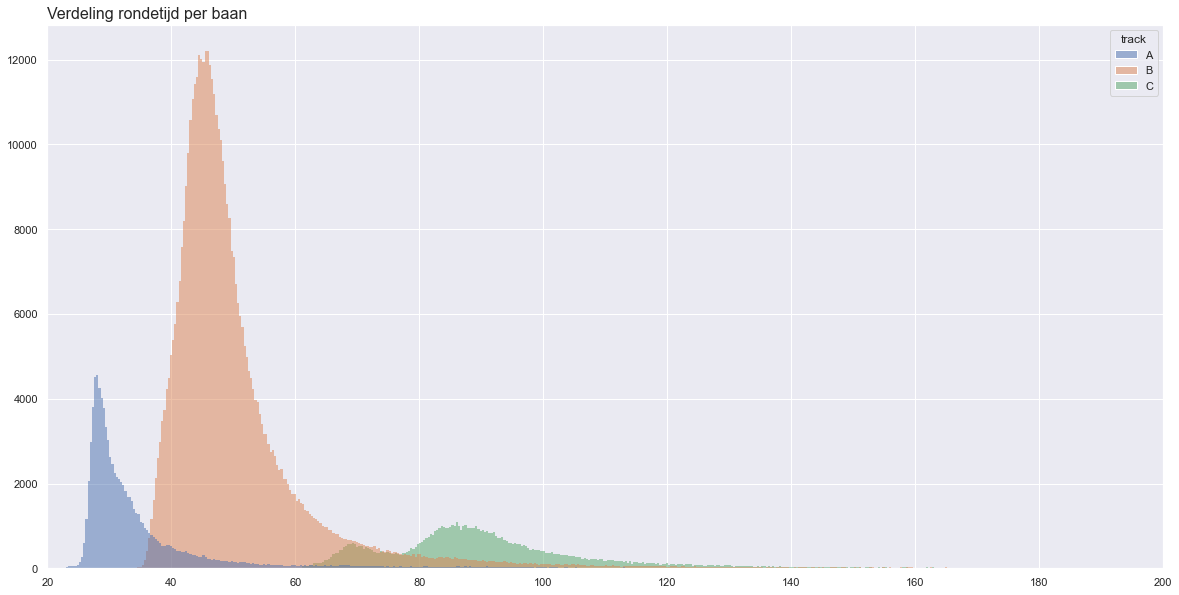

In [16]:
ax = sns.histplot(
    data=df[df["location"] == "delft"],
    x="lap_time",
    hue="track"
)
plt.xlim(20, 200)

ax.set_title("Verdeling rondetijd per baan", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

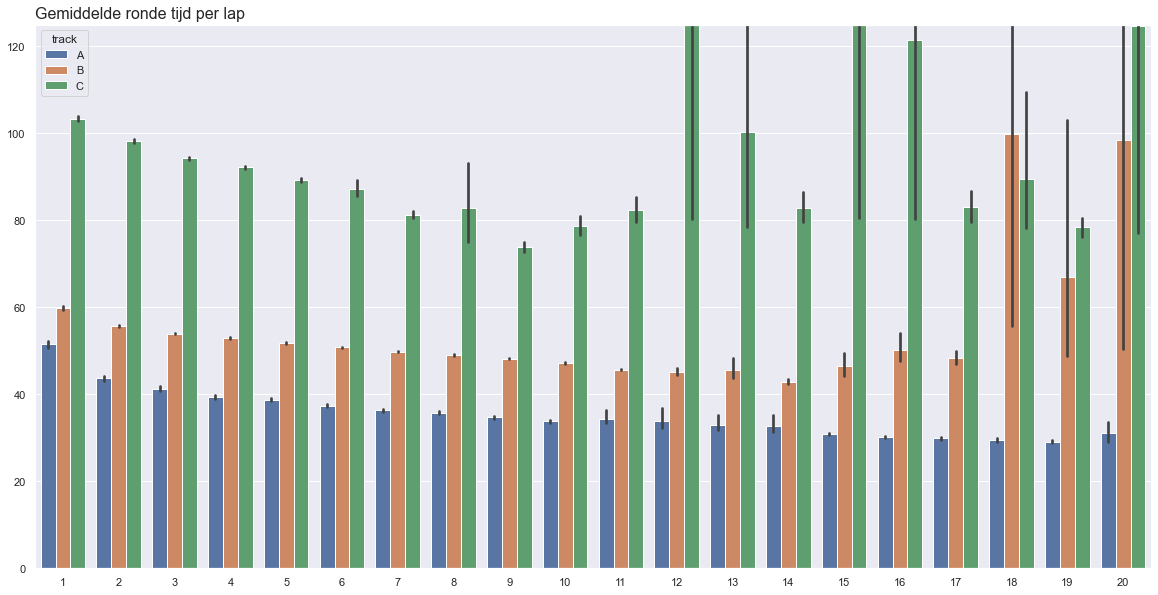

In [50]:
ax = sns.barplot(
    data=df[
        (df["location"] == "delft")
#         & (df["track"] == 'B')
        & (df["lap"] <= 20)
    ],
    x="lap",
    y="lap_time",
    hue="track"

#     color='b'
)
plt.ylim(0, 125)

ax.set_title("Gemiddelde ronde tijd per lap", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

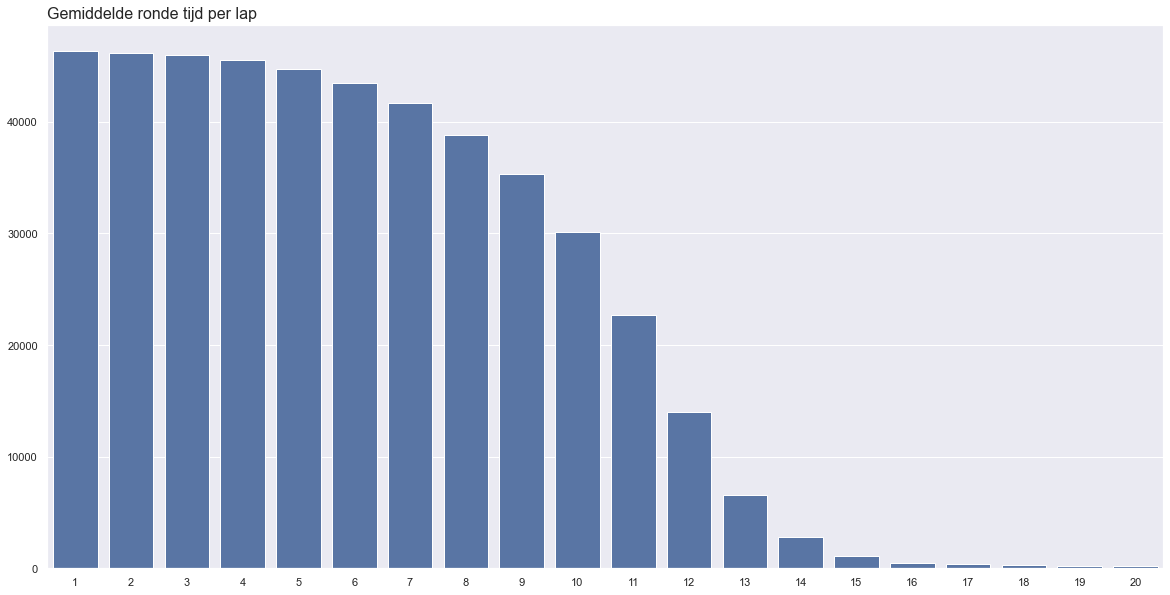

In [26]:
ax = sns.barplot(
    data=df[
        (df["location"] == "delft")
        & (df["track"] == 'B')
        & (df["lap"] <= 20)
    ].groupby("lap")["heat_id"].count().reset_index(),
    x="lap",
    y="heat_id",
    color='b'
)

ax.set_title("Aantal gereden laps", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [47]:
df.head()

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location,heat_min,track,date,hour,year_month,iso_week,iso_year
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025


In [56]:
heat_duration = df[df["location"] == "delft"] \
    .groupby(["track", "heat_id", "name"])["lap_time"].sum().reset_index() \
    .groupby(["track", "heat_id"])["lap_time"].max().reset_index()

heat_duration["lap_time"] = heat_duration["lap_time"]/60

In [57]:
heat_duration.head()

,track,heat_id,lap_time
0,A,006373CB17634EEC8BCB9C15F9569A90,10.01
1,A,0084AD71D865400CA3DF2FB3C69E4C2D,9.37
2,A,00F34F9F0E4341578E53081E3AE04E0F,9.83
3,A,011D1448B01B4FC7B9A334A41C7599C4,9.90
4,A,015FEFCFA7DF437C956AAA1896AF149F,9.86


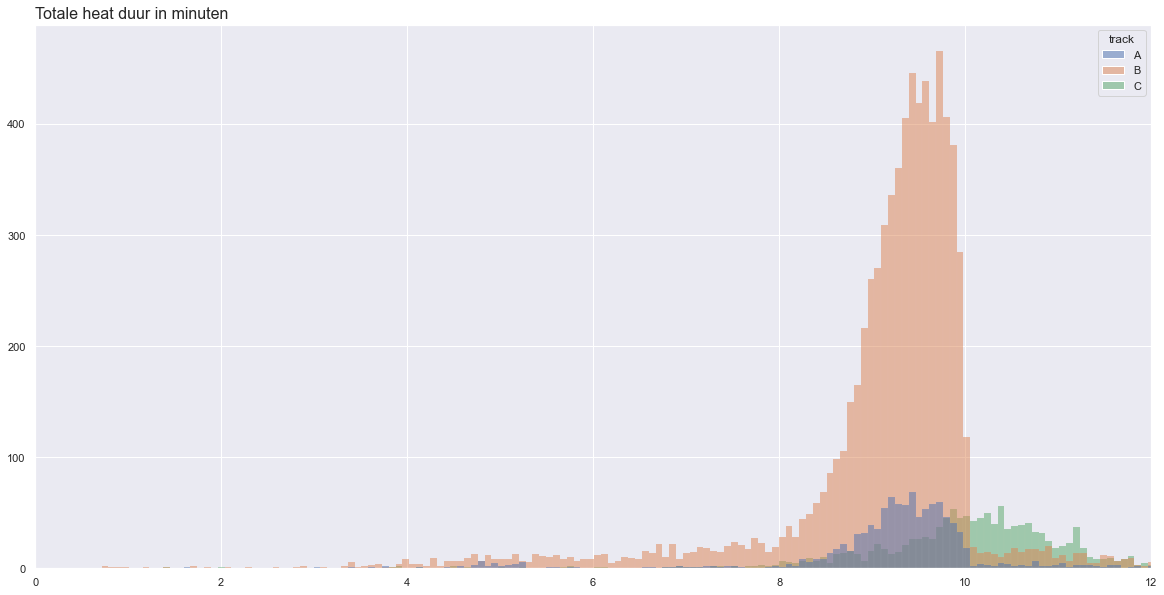

In [59]:
ax = sns.histplot(
    data=heat_duration,
    x="lap_time",
    hue="track"
)
plt.xlim(0, 12)

ax.set_title("Totale heat duur in minuten", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

### Recuring customers

In [83]:
temp = df[["location", "heat_id", "date", "name"]].drop_duplicates()
temp = temp.groupby(["location", "date", "name"])["heat_id"].count().reset_index()

In [84]:
temp = temp.groupby("heat_id")["name"].count().reset_index()
temp["%"] = temp["name"].div(temp["name"].sum()).mul(100)

In [85]:
temp

,heat_id,name,%
0,1,28159,48.87
1,2,23823,41.35
2,3,4380,7.60
3,4,393,0.68
4,5,767,1.33
5,6,34,0.06
6,7,60,0.10
7,8,1,0.00
8,12,1,0.00


In [ ]:
ax = sns.barplot(
    data=temp.groupby(["location", "date", "name"])["heat_id"].count().reset_index(),
    x="lap",
    y="heat_id",
    color='b'
)

ax.set_title("Aantal gereden laps", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [60]:
df.groupby(["location"])

,heat_id,heat_name,datetime,name,kart,lap_time,lap,location,heat_min,track,date,hour,year_month,iso_week,iso_year
0,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,54.89,1,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
1,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,40.19,2,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
2,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.14,3,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
3,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,39.05,4,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
4,523341BC2F7E42F4A3976495919C6D4D,Heat 1,2025-02-01 12:00:00,Tymon Keler,75,37.03,5,delft,30.63,A,2025-02-01,12,2025-02-01,5,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647285,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,45.29,6,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025
647286,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,45.69,7,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025
647287,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,44.88,8,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025
647288,84D2FD045DF3450AB03676E1FF922724,Heat 42,2025-04-30 21:15:00,Parsa,22,46.30,9,delft,39.49,B,2025-04-30,21,2025-04-01,18,2025


In [102]:
df[df["location"] == "delft"].groupby("date")["heat_id"].count()

date
2025-01-01    2970
2025-01-02    6236
2025-01-03    5446
2025-01-04    6311
2025-01-05    1484
              ... 
2025-09-26    2581
2025-09-27    4425
2025-09-28    4162
2025-09-29    1899
2025-09-30    1621
Name: heat_id, Length: 272, dtype: int64

<AxesSubplot:xlabel='heat_id', ylabel='Count'>

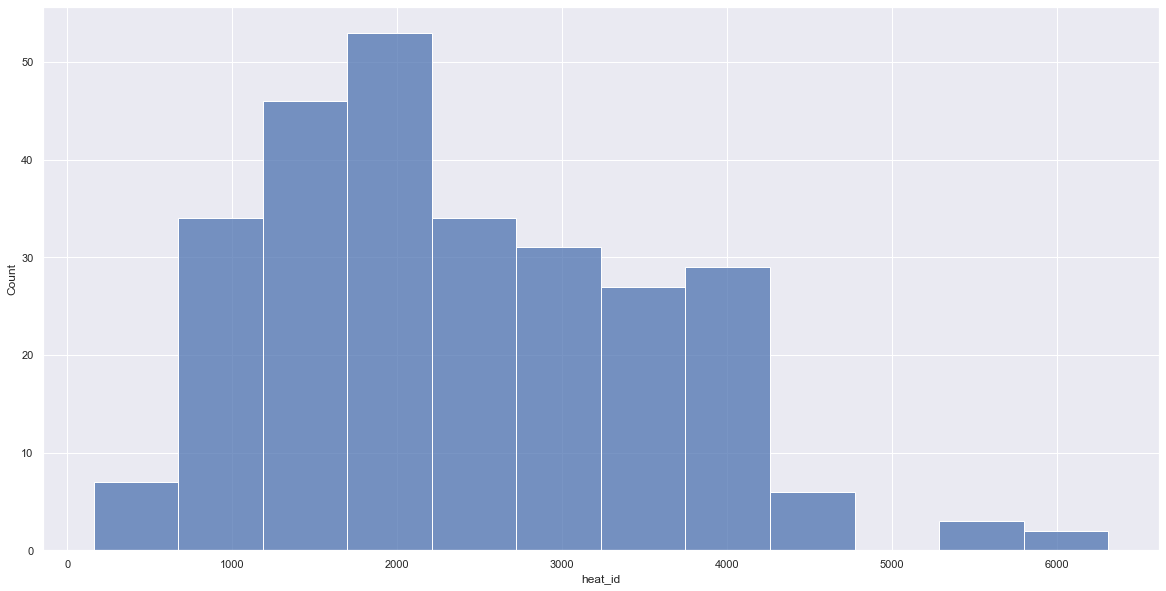

In [104]:
sns.histplot(
    data=df[df["location"] == "delft"].groupby("date")["heat_id"].count().reset_index(),
    x="heat_id"
)
# plt.xlim(0, 400)

## Aantallen

In [92]:
customers = df[["location", "date", "heat_id", "name"]].drop_duplicates()

In [93]:
customers["year"] = customers["date"].dt.year
customers["month"] = customers["date"].dt.month

In [94]:
customers.head()

,location,date,heat_id,name,year,month
0,delft,2025-02-01,523341BC2F7E42F4A3976495919C6D4D,Tymon Keler,2025,2
15,delft,2025-02-01,523341BC2F7E42F4A3976495919C6D4D,Svens Jelnieks,2025,2
31,delft,2025-02-01,523341BC2F7E42F4A3976495919C6D4D,Ethan Sheldon,2025,2
46,delft,2025-02-01,269886A38DF54694805E8518A1AB36CA,Bas Dalmulder,2025,2
59,delft,2025-02-01,269886A38DF54694805E8518A1AB36CA,Brydon Leonard,2025,2


<AxesSubplot:xlabel='month', ylabel='heat_id'>

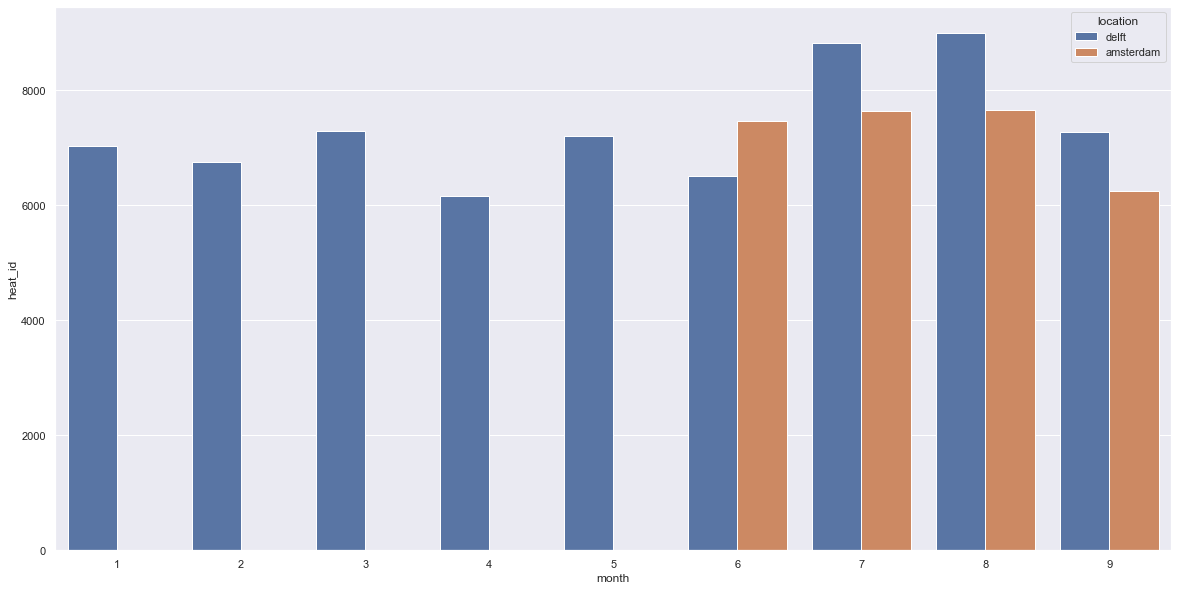

In [95]:
sns.barplot(
    data=customers.groupby(["year", "month", "location"])["heat_id"].count().reset_index(),
    x="month",
    y="heat_id",
    hue="location"
)

In [90]:
# Number of heats per month
customers.groupby(["year", "month"])["heat_id"].nunique()

year  month
2025  1        1021
      2        1043
      3        1064
      4        1031
      5        1068
      6        2128
      7        2538
      8        2766
      9        1977
Name: heat_id, dtype: int64

In [91]:
# Number of customers per month
customers.groupby(["year", "month"])["heat_id"].count()

year  month
2025  1         7022
      2         6745
      3         7293
      4         6163
      5         7204
      6        13969
      7        16457
      8        16648
      9        13517
Name: heat_id, dtype: int64

In [254]:
# Geschatte omzet
drivers.groupby("month")["omzet"].sum()

month
5      13082
6     208692
7     188821
8     210583
9     176514
10    211203
11    233430
12     19468
Name: omzet, dtype: int64